In [1]:
import numpy as np 
import pandas as pd 
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt
import warnings

In [2]:
def plot_cmat(yte, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(yte,ypred)
    plt.show()

In [3]:
# Import dataset for training using Pandas
news = pd.read_csv('datasets/data.csv')
test_news = pd.read_csv('datasets/data.csv')
title = news['title'].astype('U')
text = news['text'].astype('U')
label = news['label'].astype('U')
test_label = test_news['label'].astype('U')

title_text = title + ' ' + text
# title_text.head()
count_row = news.shape[0]
count_test_row = test_news.shape[0]
print(label.value_counts())
print(test_label.value_counts())
# test_news.count()

REAL    3171
FAKE    3164
Name: label, dtype: int64
REAL    3171
FAKE    3164
Name: label, dtype: int64


In [4]:
check_nan_in_df = news.isnull()
print (check_nan_in_df)

      Unnamed: 0  title   text  label
0          False  False  False  False
1          False  False  False  False
2          False  False  False  False
3          False  False  False  False
4          False  False  False  False
...          ...    ...    ...    ...
6330       False  False  False  False
6331       False  False  False  False
6332       False  False  False  False
6333       False  False  False  False
6334       False  False  False  False

[6335 rows x 4 columns]


In [5]:
# Splitting the dataset into test and train
text_train, text_test, label_train, label_test = train_test_split(title_text, label, test_size=0.2, random_state=7)

In [6]:
# Insert spliitted data into TfidfVectorizer and transform shape
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [7]:
transformed_text_train = vectorizer.fit_transform(text_train)
transformed_text_test = vectorizer.transform(text_test)
filename_vectorizer = 'TfidfVectorizer.sav'
pickle.dump(vectorizer, open(filename_vectorizer, 'wb')) # Saving model

Accuracy Score: 92.27%
K Fold Accuracy: 93.76%

Classification Report
              precision    recall  f1-score   support

        FAKE       0.93      0.91      0.92       638
        REAL       0.91      0.93      0.92       629

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267


Confusion Matrix
[[583  55]
 [ 43 586]]


E:\MachineLearning\FakeNewsClassifier\env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


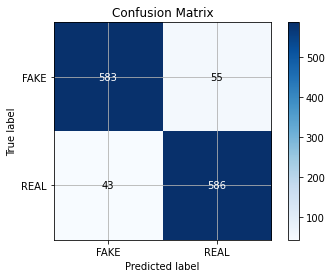

In [8]:
# Initialize Classifier
classifier = PassiveAggressiveClassifier(max_iter=100)

classifier.fit(transformed_text_train, label_train)

# Start Predict
predict = classifier.predict(transformed_text_test)

filename = 'ClassifierModel.sav'
pickle.dump(classifier, open(filename, 'wb')) # Saving model

# Get Accuracy Score
score = accuracy_score(label_test, predict)
print("Accuracy Score: %.2f%%" % (score*100))

X = vectorizer.transform(title_text)
kscore = cross_val_score(classifier, X, news['label'].values, cv=5)
print(f'K Fold Accuracy: {round(kscore.mean()*100,2)}%')

print("\nClassification Report")
print(classification_report(label_test, predict))

print("\nConfusion Matrix")
print(confusion_matrix(label_test, predict))

plot_cmat(label_test, predict) # Show Confusion Matrix

accuracy:   0.847
[[455 183]
 [ 11 618]]


E:\MachineLearning\FakeNewsClassifier\env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


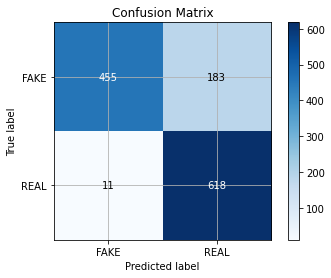

In [9]:
#Applying Naive Bayes
naive_classifier = MultinomialNB() 
naive_classifier.fit(transformed_text_train, label_train)                       # Fit Naive Bayes classifier according to X, y
pred = naive_classifier.predict(transformed_text_test)                     # Perform classification on an array of test vectors X.
naive_score = metrics.accuracy_score(label_test, pred)
print("accuracy:   %0.3f" % naive_score)
cm = metrics.confusion_matrix(label_test, pred)
print(cm)
plot_cmat(label_test, pred) # Show Confusion Matrix